In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from aliases import TEAM_ALIAS, REF_ALIAS
from scipy.stats import poisson

## MATCH LEVEL DATA STUFF

#### Import match level data 

In [2]:
match_level_data_test = pd.read_excel('data/match_level_data/match_data_combined_cleaned.xlsx', sheet_name = '2021-2022')
match_level_data_test

,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR
0,2021-08-13,Brentford,Arsenal,M Oliver,0,0,0,0
1,2021-08-14,Man United,Leeds,P Tierney,1,2,0,0
2,2021-08-14,Burnley,Brighton,D Coote,2,1,0,0
3,2021-08-14,Chelsea,Crystal Palace,J Moss,0,0,0,0
4,2021-08-14,Everton,Southampton,A Madley,2,0,0,0
...,...,...,...,...,...,...,...,...
375,2022-05-22,Crystal Palace,Man United,M Atkinson,2,4,0,0
376,2022-05-22,Leicester,Southampton,J Moss,0,1,0,0
377,2022-05-22,Liverpool,Wolves,A Taylor,1,0,0,0
378,2022-05-22,Man City,Aston Villa,M Oliver,0,1,0,0


In [4]:
file_path = 'data/match_level_data/match_data_combined_cleaned.xlsx' # The workbook book that contains the cleaned match data

sheets = pd.ExcelFile(file_path).sheet_names # pd.excelfile opens and excel file and inspect inside, better than calling pd.readexcel 5 times

all_seasons = []

for sheet in sheets: # Loops through the sheets
    df = pd.read_excel(file_path, sheet_name = sheet)
    
    # Create standardised home_team_id and away_team_id columns
    df['home_team_id'] = df['HomeTeam'].str.strip().str.lower()
    df['away_team_id'] = df['AwayTeam'].str.strip().str.lower()
    
    # Alias check
    df['home_team_id'] = df['home_team_id'].replace(TEAM_ALIAS)
    df['away_team_id'] = df['away_team_id'].replace(TEAM_ALIAS)

    # Clean referee column
    df['Referee'] = df['Referee'].str.strip().str.lower() 
    
    # Create standardised referee_id column - the same as when making it during ref modelling
    df['referee_id'] = (
        df['Referee'].str.split().str[0].str[0] # Splits the string into first/last name, grabs the first name, then grabs the first letter
        + '_'
        + df['Referee'].str.split().str[-1] # Splits the string into first/last name, grabs the last name
    )
    
    # Alias check
    df['referee_id'] = df['referee_id'].replace(REF_ALIAS)
    
    # Parse dates
    df['Date'] = pd.to_datetime(df['Date']) # Ensure date column is datetime object
    
    # Create season column
    df['season'] = sheet
    
     # Create standardised match_id column
    df['match_id'] = (
        df['season'].astype(str) 
        + '_' + df['Date'].dt.strftime('%Y-%m-%d') # Converts datetime object into a string in a specific format
        + '_' + df['home_team_id'] 
        + '_' + df['away_team_id']
    )
    
    # Create card summation columns
    df['home_cards'] = df['HY'] + df['HR']
    df['away_cards'] = df['AY'] + df['AR']
    df['total_cards'] = df['home_cards'] + df['away_cards']
    
    
    # Append each season to all_seasons list
    all_seasons.append(df)
    
    # Concat into one dataframe
    match_data = pd.concat(all_seasons, ignore_index=True)

In [5]:
match_data

,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,home_team_id,away_team_id,referee_id,season,match_id,home_cards,away_cards,total_cards
0,2025-08-15,Liverpool,Bournemouth,a taylor,1,2,0,0,liverpool,bournemouth,a_taylor,2025-2026,2025-2026_2025-08-15_liverpool_bournemouth,1,2,3
1,2025-08-16,Aston Villa,Newcastle,c pawson,1,1,1,0,aston villa,newcastle,c_pawson,2025-2026,2025-2026_2025-08-16_aston villa_newcastle,2,1,3
2,2025-08-16,Brighton,Fulham,s barrott,3,3,0,0,brighton,fulham,s_barrott,2025-2026,2025-2026_2025-08-16_brighton_fulham,3,3,6
3,2025-08-16,Sunderland,West Ham,r jones,0,1,0,0,sunderland,west ham,r_jones,2025-2026,2025-2026_2025-08-16_sunderland_west ham,0,1,1
4,2025-08-16,Tottenham,Burnley,m oliver,0,0,0,0,tottenham,burnley,m_oliver,2025-2026,2025-2026_2025-08-16_tottenham_burnley,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2022-05-22,Crystal Palace,Man United,m atkinson,2,4,0,0,crystal palace,man united,m_atkinson,2021-2022,2021-2022_2022-05-22_crystal palace_man united,2,4,6
1676,2022-05-22,Leicester,Southampton,j moss,0,1,0,0,leicester,southampton,j_moss,2021-2022,2021-2022_2022-05-22_leicester_southampton,0,1,1
1677,2022-05-22,Liverpool,Wolves,a taylor,1,0,0,0,liverpool,wolves,a_taylor,2021-2022,2021-2022_2022-05-22_liverpool_wolves,1,0,1
1678,2022-05-22,Man City,Aston Villa,m oliver,0,1,0,0,man city,aston villa,m_oliver,2021-2022,2021-2022_2022-05-22_man city_aston villa,0,1,1


In [7]:
# Sort match_data chronologically 
match_data = match_data.sort_values('Date').reset_index(drop=True)
match_data


,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,home_team_id,away_team_id,referee_id,season,match_id,home_cards,away_cards,total_cards
0,2021-08-13,Brentford,Arsenal,m oliver,0,0,0,0,brentford,arsenal,m_oliver,2021-2022,2021-2022_2021-08-13_brentford_arsenal,0,0,0
1,2021-08-14,Chelsea,Crystal Palace,j moss,0,0,0,0,chelsea,crystal palace,j_moss,2021-2022,2021-2022_2021-08-14_chelsea_crystal palace,0,0,0
2,2021-08-14,Norwich,Liverpool,a marriner,1,1,0,0,norwich,liverpool,a_marriner,2021-2022,2021-2022_2021-08-14_norwich_liverpool,1,1,2
3,2021-08-14,Watford,Aston Villa,m dean,3,1,0,0,watford,aston villa,m_dean,2021-2022,2021-2022_2021-08-14_watford_aston villa,3,1,4
4,2021-08-14,Man United,Leeds,p tierney,1,2,0,0,man united,leeds,p_tierney,2021-2022,2021-2022_2021-08-14_man united_leeds,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2025-12-14,Nott'm Forest,Tottenham,s barrott,1,3,0,0,nottingham forest,tottenham,s_barrott,2025-2026,2025-2026_2025-12-14_nottingham forest_tottenham,1,3,4
1676,2025-12-14,West Ham,Aston Villa,a taylor,1,2,0,0,west ham,aston villa,a_taylor,2025-2026,2025-2026_2025-12-14_west ham_aston villa,1,2,3
1677,2025-12-14,Brentford,Leeds,j brooks,0,0,0,0,brentford,leeds,j_brooks,2025-2026,2025-2026_2025-12-14_brentford_leeds,0,0,0
1678,2025-12-14,Crystal Palace,Man City,d england,2,0,0,0,crystal palace,man city,d_england,2025-2026,2025-2026_2025-12-14_crystal palace_man city,2,0,2


In [8]:
# Create a weekly batch column (calendar weeks)
match_data['week'] = match_data['Date'].dt.to_period('W')
match_data


,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,home_team_id,away_team_id,referee_id,season,match_id,home_cards,away_cards,total_cards,week
0,2021-08-13,Brentford,Arsenal,m oliver,0,0,0,0,brentford,arsenal,m_oliver,2021-2022,2021-2022_2021-08-13_brentford_arsenal,0,0,0,2021-08-09/2021-08-15
1,2021-08-14,Chelsea,Crystal Palace,j moss,0,0,0,0,chelsea,crystal palace,j_moss,2021-2022,2021-2022_2021-08-14_chelsea_crystal palace,0,0,0,2021-08-09/2021-08-15
2,2021-08-14,Norwich,Liverpool,a marriner,1,1,0,0,norwich,liverpool,a_marriner,2021-2022,2021-2022_2021-08-14_norwich_liverpool,1,1,2,2021-08-09/2021-08-15
3,2021-08-14,Watford,Aston Villa,m dean,3,1,0,0,watford,aston villa,m_dean,2021-2022,2021-2022_2021-08-14_watford_aston villa,3,1,4,2021-08-09/2021-08-15
4,2021-08-14,Man United,Leeds,p tierney,1,2,0,0,man united,leeds,p_tierney,2021-2022,2021-2022_2021-08-14_man united_leeds,1,2,3,2021-08-09/2021-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2025-12-14,Nott'm Forest,Tottenham,s barrott,1,3,0,0,nottingham forest,tottenham,s_barrott,2025-2026,2025-2026_2025-12-14_nottingham forest_tottenham,1,3,4,2025-12-08/2025-12-14
1676,2025-12-14,West Ham,Aston Villa,a taylor,1,2,0,0,west ham,aston villa,a_taylor,2025-2026,2025-2026_2025-12-14_west ham_aston villa,1,2,3,2025-12-08/2025-12-14
1677,2025-12-14,Brentford,Leeds,j brooks,0,0,0,0,brentford,leeds,j_brooks,2025-2026,2025-2026_2025-12-14_brentford_leeds,0,0,0,2025-12-08/2025-12-14
1678,2025-12-14,Crystal Palace,Man City,d england,2,0,0,0,crystal palace,man city,d_england,2025-2026,2025-2026_2025-12-14_crystal palace_man city,2,0,2,2025-12-08/2025-12-14


## Split Data into Test Set and Training Set

- Earliest season will be used to train the model.
- Following seasons will be used week by week to test the model.

In [9]:
first_season = sorted(match_data['season'].unique())[0] # Sorts match_data by unique season label (list of strings), select the earliest season (string format). 

history = match_data[match_data['season'] == first_season].copy() # Create a dataframe of the eariest season, name it history, this is the training dataset.
 
future = match_data[match_data['season'] != first_season].copy() # Create a dataframe of the other seasons, name it future, this is the testing dataset.

test_weeks = sorted(future['week'].unique()) # Create a list of unique weeks in future, sort chronologically.

print("Initial training season:", first_season)
print("Number of test weeks:", len(test_weeks))

Initial training season: 2021-2022
Number of test weeks: 123


### Create Weighting Functionality

- The aim is to have a per match weighting using an exponential decay formula. The older a match is from the date of the match to be predicted, the less important it is.
- Function that calculates the number of days between today and the date the match was played, then uses that and the exponential decay formula to calculate the matches weighting. Then creates a column in the dataframe for it.
- Changed this slightly to allow for seperate alphas, and therefore weighting, for refs and teams, this will allow for refining the model more easily later on.
- Wmean fuction that uses the weights column and the card info columns to create weighted means.


In [10]:
def add_time_weights(history, asof_date, alpha_team=0.002, alpha_ref= 0.001):
    '''
    Inputs:
    history_df : DataFrame
        All matches that happened before the week being predicted.

    asof_date : datetime
        The reference date for weighting (typically the earliest date
        in the current test batch)? This is bascially the date we are 'standing on', i.e. today.

    alpha_team and alpha_ref: float
        Per-day exponential decay rate.
        Larger alpha means older matches lose importance faster.
        alpha here is per-day decay; tune later
        
    Returns:
    DataFrame
        Same as history dataframe but with an added columns containing time-decay weights for each past match.

    days_ago = How many days ago did this match happen relative to today? Will get one number per match.
    '''
    # Takes asof date and minuses the date of each match in history then converts into integers
    days_ago = (asof_date - history['Date']).dt.days 
    
    # Create columns in the history dataframe for team and ref weights using the exponential decay formula
    history['weight_team'] = np.exp(-alpha_team * days_ago) 
    history['weight_ref'] = np.exp(-alpha_ref * days_ago) 
    
    return history 

In [11]:
def wmean(x, weight):
    '''
    Calculate average card count, but with recent matches counting more than old ones.
    x is the vector/series of all the past games.
    weight is the vector/series of weights applied to that game using the exponential decay formula.
    /weight.sum() is the normalisation step, this ensures the wights sum to 1.
    '''
    return (x * weight).sum() / weight.sum()

## Build Team Profiles 

- Home_team_profile function that builds the home team dataframe.
- Away_team_profile function that builds the home team dataframe.
- Team_profiles function that combines the functions.

In [12]:
def build_home_team_profiles(history_with_weights):
    '''
    Group history dataframe by each teams home games (e.g. all home arsenal games).
    For each team subset(t), run the following:
    Create a dictionary where the keys are the column names, and the values are calculated using the wmean / len / sum functions.
    Wrap the dictionary in pd.series to turn the dictinary into a series/single row. Dict/group -> one output row.
    This will return a pandas series that contains the weighted means for that team.
    Pandas does this for every team subset(t), stacks the series together, and builds a new dataframe (home).
    
    Returns:
        home_cards_for: 
            Weighted average number of cards the team (arsenal) receives when playing at home.
        home_cards_against: 
            Weighted average number of cards the team's opponents receive when the team (arsenal) plays at home.
        home_matches_count: 
            Count of home matches played by the team.
        home_weights_sum: 
            Sum of the weights for the team's home matches, shows recency of the teams profile, higher = more recent evidence.
    '''

    home = history_with_weights.groupby('home_team_id').apply(           
        lambda t: pd.Series({
            'home_cards_for': wmean(t['home_cards'], t['weight_team']),
            'home_cards_against': wmean(t['away_cards'], t['weight_team']),
            'home_matches_count': len(t),
            'home_weights_sum': t['weight_team'].sum()
        } ),
        include_groups=False
        ) 
    return home

In [13]:
def build_away_team_profiles(history_with_weights):
    '''
    Group history dataframe by each teams away games (e.g. all away fulham games).
    See previous function for more info.
    
    Returns:
        away_cards_for: 
            Weighted average number of cards the team (fulham) receives when playing away.
        away_cards_against: 
            Weighted average number of cards the team's opponents receive when the team (fulham) plays away.
        away_matches_count: 
            Count of away matches played by the team.
        away_weights_sum:   
            Sum of the weights for the team's away macthes, shows recency of the teams profile, higher = more recent evidence.
    '''
    
    away = history_with_weights.groupby('away_team_id').apply(           
        lambda t: pd.Series({
            'away_cards_for': wmean(t['away_cards'], t['weight_team']),
            'away_cards_against': wmean(t['home_cards'], t['weight_team']),
            'away_matches_count': len(t),
            'away_weights_sum': t['weight_team'].sum()
        } ),
        include_groups=False
        ) 
        
    return away

In [14]:
def build_team_profiles(history_with_weights):
    '''
    Call the home and away team functions, and join into one dataframe - teams
    'outer' means keep teams that appear in either table
    '''
    
    home = build_home_team_profiles(history_with_weights)
    away = build_away_team_profiles(history_with_weights)
    
    teams = home.join(away, how='outer')
    
    return teams

In [15]:
# Function that takes in a team name and the teams dataframe, and returns a series of data for that team.

def get_team_profile(team_id, teams):
    return teams.loc[team_id]

In [16]:
def expected_team_lambdas(home_id, away_id, teams):
    '''
    Function that takes in home and away teams and teams dataframe.
    Calls the get_team_profile function to obtain the teams weighted profiles.
    
    The expected number of cards for the home team is calculated as the average of:
    1. How many cards the home team typically receives when playing at home (H[home_cards_for]). 
    2. How many cards the away team typically allows their opponents to receive when playing away (A['away_cards_against']).
    
    The expected number of cards for the away team is calculated as the average of:
    1. How many cards the away team typically receives when playing away (A[away_cards_for]).
    2. How many cards the home team typically allows their opponents to receive when playing at home (H['home_cards_against']).
    
    Function returns team and total lambdas
    '''
    # Obtain team profiles
    H = get_team_profile(home_id, teams)
    A = get_team_profile(away_id, teams)

    # Calculate team card expectations / lambdas
    home_lam = np.mean([H['home_cards_for'], A['away_cards_against']])
    away_lam = np.mean([A['away_cards_for'], H['home_cards_against']])

    return home_lam, away_lam, home_lam + away_lam

## Build Ref Profiles

In [17]:
# THIS IS ONLY BEING USED FOR BUILDING REFS_OVER_TIME (LATER ANALYSIS) BECAUSE WE ARE NO LONGER SCLAING TO REFS.

def build_ref_profiles(history_with_weights):
    '''
    Group history dataframe by each ref (e.g. m_oliver).
    For each team ref(r), run the following:
    Create a dictionary where the keys are the column names, and the values are calculated using the wmean / len / sum functions.
    Wrap the dictionary in pd.series to turn the dictinary into a series/single row. Dict/group -> one output row.
    This will return a pandas series that contains the weighted mean for that ref.
    Pandas does this for every ref subset(r), stacks the series together, and builds a new dataframe (home).
    
    Returns:
        ref_cards_per_game: 
            Weighted average number of cards the ref gives.
        ref_match_count: 
            Count of matches refereed by the ref.
        ref_weights_sum: 
            Sum of the weights for the refs matches, shows recency of the refs profile, higher = more recent evidence.
    '''

    refs = history_with_weights.groupby('referee_id').apply(           
        lambda r: pd.Series({
            'ref_cards_per_game':wmean(r['total_cards'], r['weight_ref']),
            'ref_match_count': len(r),
            'ref_weights_sum': r['weight_ref'].sum()
        } ),
        include_groups=False
        ) 
    return refs

### Learned Team Lambda Weighting

#### Original Approach: Fixed 50/50 Weights

The initial model assumed equal importance between a team's own tendency and their opponent's tendency when predicting cards:

**For home team cards:**
- home_cards = (50% × home_tendency) + (50% × away_opponent_conceding)

**For away team cards:**
- away_cards = (50% × away_tendency) + (50% × home_opponent_conceding)

This 50/50 split was a reasonable starting assumption, but may not reflect reality. For example:
- Perhaps a team's own disciplinary record matters more than their opponent's tendency to cause cards?
- Perhaps away teams are more reactive to their environment, making opponent context more important?
- Perhaps home teams have more control over the match flow, making their own tendency dominant?

#### New Approach: Data-Driven Weight Learning

Rather than hard-coding these weights, the model now **learns optimal weights from historical data** using the `fit_team_mix_weights_simple()` function.

**The question being asked:**
For predicting home team cards, which matters more:
1. How many cards does this home team typically receive whilst playing at home? (home_for)
2. How many cards does this away team typically cause their opponents to receive? (away_against)

The same question applies to away team cards.

**How it works:**
The function uses correlation analysis to determine which tendencies are more predictive of actual outcomes. Whichever tendency correlates more strongly with actual cards receives proportionally more weight.

**Key findings:**
The learned weights revealed an interesting asymmetry:

**Home team cards:** ~60% home_for, ~40% away_against
- Home teams' own tendency matters more
- Home teams have more control over their disciplinary record

**Away team cards:** ~45% away_for, ~55% home_against  
- The home opponent's context matters MORE than the away team's own tendency
- Away teams are more reactive to their environment
- This suggests playing at a particular ground or against a particular home team significantly influences away team discipline

This learned weighting improved model performance on all metrics compared to the fixed 50/50 approach, demonstrating the value of letting the data reveal these patterns rather than imposing assumptions.

In [ ]:
from scipy.optimize import minimize

def fit_team_mix_weights_simple(history, teams_over_time, min_matches=100):
    """
    Simpler approach: just measure correlation between tendencies and outcomes.
    
    Whichever tendency correlates more strongly with actual cards gets more weight.
    """
    
    # Build dataset (same as before)
    rows = []
    
    for idx, match in history.iterrows():
        
        home_team = match["home_team_id"]
        away_team = match["away_team_id"]
        match_week = match["week"]
        
        home_profiles = teams_over_time[teams_over_time["team_id"] == home_team]
        away_profiles = teams_over_time[teams_over_time["team_id"] == away_team]
        
        if home_profiles.empty or away_profiles.empty:
            continue
        
        home_before = home_profiles[home_profiles["week"] < match_week]
        away_before = away_profiles[away_profiles["week"] < match_week]
        
        if home_before.empty or away_before.empty:
            continue
        
        home_profile = home_before.sort_values("week").iloc[-1]
        away_profile = away_before.sort_values("week").iloc[-1]
        
        rows.append({
            "home_for": home_profile["home_cards_for"],
            "home_against": home_profile["home_cards_against"],
            "away_for": away_profile["away_cards_for"],
            "away_against": away_profile["away_cards_against"],
            "actual_home": match["home_cards"],
            "actual_away": match["away_cards"],
        })
    
    df = pd.DataFrame(rows)
    
    if len(df) < min_matches:
        return {
            "home_for": 0.5, 
            "away_against": 0.5,
            "away_for": 0.5, 
            "home_against": 0.5
        }
    
    # Calculate correlations
    corr_home_for = df["home_for"].corr(df["actual_home"])
    corr_away_against = df["away_against"].corr(df["actual_home"])
    
    corr_away_for = df["away_for"].corr(df["actual_away"])
    corr_home_against = df["home_against"].corr(df["actual_away"])
    
    # Convert correlations to weights (proportional to correlation strength)
    # Make sure they're non-negative
    w_home_for = max(0, corr_home_for)
    w_away_against = max(0, corr_away_against)
    
    w_away_for = max(0, corr_away_for)
    w_home_against = max(0, corr_home_against)
    
    # Normalize to sum to 1
    total_home = w_home_for + w_away_against
    total_away = w_away_for + w_home_against
    
    if total_home > 0:
        w_home_for /= total_home
        w_away_against /= total_home
    else:
        w_home_for = w_away_against = 0.5
    
    if total_away > 0:
        w_away_for /= total_away
        w_home_against /= total_away
    else:
        w_away_for = w_home_against = 0.5
    
    print(f"  Correlations -> Home: {w_home_for:.3f}/{w_away_against:.3f}, Away: {w_away_for:.3f}/{w_home_against:.3f}")
    
    return {
        "home_for": w_home_for,
        "away_against": w_away_against,
        "away_for": w_away_for,
        "home_against": w_home_against
    }

## Generating Match Predictions

### Overview

The `expected_lambdas()` function combines team profiles and learned mixing weights to generate card predictions for individual matches. 

### Team Lambda Calculation

The function calculates expected cards for each team using the learned mixing weights:

**Home team cards:**
```
home_lambda = w_home_for × home_cards_for + w_away_against × away_cards_against
```

**Away team cards:**
```
away_lambda = w_away_for × away_cards_for + w_home_against × home_cards_against
```

Where the weights (w) are learned dynamically from historical data rather than fixed at 0.5.

### Why Not Scale to Referee Lambda?

An earlier version of the model scaled team predictions to match individual referee tendencies. However, testing revealed that **removing this scaling improved all performance metrics** (MAE, RMSE, Bias, and Log-Loss).

**Reasoning:**
- Team tendencies are learned from real historical matches, which already included various referees
- The learned mixing weights implicitly capture referee effects through the actual outcomes they're trained on
- Explicitly scaling to individual referee lambdas created redundancy and conflicting adjustments
- The simpler approach (trusting team predictions directly) proved more accurate

**Note:** Referee profiles are still built and stored in `refs_over_time` for diagnostic purposes and potential future analysis, but they do not influence match predictions.

### Data Quality Checks and Fallbacks

The function implements several safeguards to ensure robust predictions even with incomplete data:

#### 1. Team Existence Check
Verifies that both teams appear in the historical team profiles dataframe. New teams (e.g., newly promoted sides) will fail this check.

#### 2. Team Data Sufficiency Check  
Ensures teams have played a minimum number of matches (default: 3) in their respective venue (home/away). Teams with insufficient match history are unreliable.

#### 3. League Average Fallbacks
When teams fail existence or sufficiency checks, the model uses league-wide averages as fallback values:
- `league_home_avg_cards`: Average cards received by home teams across the league
- `league_away_avg_cards`: Average cards received by away teams across the league

These fallbacks ensure every match receives a prediction, even for newly promoted teams or those with limited data.

**Mapping fallback values:**
The league averages are mapped into the four required tendency slots:
- From home team perspective:
  - `home_for` = league_home_avg_cards (cards home teams typically receive)
  - `home_against` = league_away_avg_cards (cards home teams typically concede = away team receives)
  
- From away team perspective:
  - `away_for` = league_away_avg_cards (cards away teams typically receive)
  - `away_against` = league_home_avg_cards (cards away teams typically concede = home team receives)

#### 4. Mathematical Validity Checks
Before returning predictions, the function validates:
- `team_total_lambda > 0`: Ensures positive expected values
- `np.isfinite(team_total_lambda)`: Catches NaN or infinity values
- Returns `None` if validation fails, allowing the loop to skip problematic matches

These checks prevent mathematical errors and ensure all returned predictions are physically meaningful (you can't have negative expected cards).


In [19]:
def expected_lambdas(
    home_id, 
    away_id, 
    teams, 
    league_home_avg_cards, 
    league_away_avg_cards,
    team_mix_weights,
    min_team_matches = 3, 
    ):
    
    '''
    Output expectations regarding the checks:
    Teams:
        If a team has not played any games (just been promoted), it will fail the Team Existance Check. The team will default to using leauge average.
        If a team does not have at least 3 home games in history, it will fail the Team Data Sufficiency Check. The team will default to using leauge average.
        If a team does not have at least 3 away games in history, it will fail the Team Data Sufficiency Check. The team will default to using leauge average.
    '''
    
    # ---------------------- TEAMS ---------------------- 
    # --- Check team existence and data sufficiency, with informative messages ---

    # Home team
    # Check if home team has appeared in teams/history before, if they have not, set home_ok to False.
    # If the team does appear, check that they meet the minimum game requirement, if they do not, set home_ok to False.
    # If the teams passes both checks, set home_ok to True.
    if home_id not in teams.index:
        print(f"Team {home_id} not found. This must be {home_id}'s first appearance. Using league home average instead.")
        home_ok = False
    else:
        home_matches_count = teams.loc[home_id, 'home_matches_count']
        if home_matches_count < min_team_matches:
            print(f"Team {home_id} only has {home_matches_count} home appearances - not enough data. Using league home average instead.")
            home_ok = False
        else:
            home_ok = True

    # Away team
    # Check if awayteam has appeared in teams/history before, if they have not, set away_ok to False.
    # If the team does appear, check that they meet the minimum game requirement, if they do not, set away_ok to False.
    # If the teams passes both checks, set away_ok to True.
    if away_id not in teams.index:
        print(f"Team {away_id} not found. This must be {away_id}'s first appearance. Using league away average instead.")
        away_ok = False
    else:
        away_matches_count = teams.loc[away_id, 'away_matches_count']
        if away_matches_count < min_team_matches:
            print(f"Team {away_id} only has {away_matches_count} away appearances - not enough data. Using league away average instead.")
            away_ok = False
        else:
            away_ok = True
    
    
    # --- League fallback values for teams with insufficient history ---
    # Only two real league averages exist:
    #   1. league_home_avg_cards → typical cards received by a home team
    #   2. league_away_avg_cards → typical cards received by an away team
    # Key:
    #   Cards received by home team = Cards conceded by away team
    #   Cards received by away team = Cards conceded by home team
    # We map these into the four slots needed by the model.

    # Home team perspective
    league_home_for     = league_home_avg_cards   # cards home team receives ("for")
    league_home_against = league_away_avg_cards   # cards home team concedes ("against") → equal to cards received by away team

    # Away team perspective
    league_away_for     = league_away_avg_cards   # cards away team receives ("for")
    league_away_against = league_home_avg_cards   # cards away team concedes ("against") → equal to cards received by home team
        
        
        
    # --- Fill the four required numbers ---
    # For each slot (home_for, home_against, away_for, away_against),
    # Use the team’s real profile if it exists and is sufficient (home_ok / away_ok),
    # Else fall back to league-wide averages.
    if home_ok:
        H = teams.loc[home_id]
        home_for = H["home_cards_for"]
        home_against = H["home_cards_against"]
    else:
        home_for = league_home_for
        home_against = league_home_against

    if away_ok:
        A = teams.loc[away_id]
        away_for = A["away_cards_for"]
        away_against = A["away_cards_against"]
    else:
        away_for = league_away_for
        away_against = league_away_against
        
    # LAMBDA CALCULATIONs
    # NEW MIX WEIGHTS LAMBDA STUFF
    w = team_mix_weights

    home_lam = w["home_for"] * home_for + w["away_against"] * away_against
    away_lam = w["away_for"] * away_for + w["home_against"] * home_against
    team_total_lam = home_lam + away_lam
    
    # Check team_total_lam for zero/negative values and ensure it is a real number
    if team_total_lam <= 0 or not np.isfinite(team_total_lam):
        return None
    
    
    ############################################### SCALING NOW REMOVED ###############################################################################
    # SCLAING
    # Set scaling
    # scale = ref_lam / team_total_lam

    # Apply scaling
    # home_adj = home_lam * scale
    # away_adj = away_lam * scale
    # total_adj = team_total_lam * scale # Should be the same as ref_lam
    #################################################################################################################################################
    
    # No Scaling
    total_adj = team_total_lam
    home_adj = home_lam
    away_adj = away_lam
    scale = 1
    
    return home_adj, away_adj, total_adj, team_total_lam, scale


## Walk Forward Loop

In [ ]:
results = []

test_weeks = sorted(future['week'].unique()) # Create a list of unique weeks in future (this is the test set), sort chronologically.

i = 0

# for tendency balance 
team_history = []
ref_history = []

for week in test_weeks:
    
    # (1)
    # Select the matches in the that week of test_weeks, make a dataframe of them called 'batch', make a copy of it.
    # Batch is the set of games to be predicted within this run of the loop.
    batch = future[future['week'] == week].copy() 
    
    # (2)
    # Set asof_date by selecting the earliest date within that week's batch.
    # This is the cut-off date, anything before it is history.
    asof_date = batch['Date'].min()
    
    # (3) 
    # Build weighted history using history dataframe and asof_date.
    history_with_weights = add_time_weights(history, asof_date)
    
    # (4) 
    # Build leauge averages for teams that failed the data sufficiency checks. 
    # Pass all home_card match and weights data into wmean to get the weighted average for home cards accross the leauge.  
    league_home_avg_cards = wmean(
        history_with_weights['home_cards'],
        history_with_weights['weight_team']
    )

    league_away_avg_cards = wmean(
        history_with_weights['away_cards'],
        history_with_weights['weight_team']
    )
    
    # (5)
    # Build rolling team profiles.
    teams = build_team_profiles(history_with_weights)
    
    # (5.5)
    # Snapshot current team profiles and tag with team_id and week for time-series storage.
    teams_snapshot = teams.copy()
    teams_snapshot["team_id"] = teams_snapshot.index
    teams_snapshot["week"] = week
    team_history.append(teams_snapshot)
        
    ###################### THIS IS ONLY BEING USED FOR BUILDING REFS_OVER_TIME (LATER ANALYSIS) BECAUSE WE ARE NO LONGER SCLAING TO REFS. #########################################    
    # (6)
    # Build rolling ref profiles.
    refs = build_ref_profiles(history_with_weights)
    
    #####################################################################################################################################################################################
    
    # (7)
    # Store team/ref profiles for diagnostics
    team_history.append(teams.assign(week=week))
    ref_history.append(refs.assign(week=week))
    
    # Diagnostic Print of first week
    if i < 2:
        print("\n========== WEEK", week, "==========")
        print(teams.head(3))

    i += 1
    
    # (8)
    # Learn the optimal mix of home/away tendencies from history
    # Diagnostic Print showing how much data we currently have 
    print("Week", week, "history size:", len(history))
    
    # Combine all team snapshots from previous weeks into one big DataFrame.
    teams_over_time = pd.concat(team_history, ignore_index = True) 
    
    
    team_mix_weights = fit_team_mix_weights_simple(history, teams_over_time)
    
    
    print(f"Week {week} mix weights:", team_mix_weights)

    
    # (9)
    # Predict matches in batch.
    # Iterate over the batch dataframe.
    # Unpack each match into index (_) and series (row), do not care about the index.
    
    for _, row in batch.iterrows(): 

        # Generate expected lambdas by calling the expected_lambdas function.
        output = expected_lambdas(
            home_id=row['home_team_id'],
            away_id=row['away_team_id'],
            teams=teams,
            league_home_avg_cards=league_home_avg_cards,
            league_away_avg_cards=league_away_avg_cards,
            team_mix_weights=team_mix_weights
        )

        
        # If any issues with data, move to next entry.
        if output is None:
            continue

        # Unpack the tuple output 
        home_adj, away_adj, total_adj, base_total, scale= output

        # Append a dictionary of the results to the results list
        results.append({
            'Date': row['Date'],
            'week': week,
            'match_id': row['match_id'],
            'actual_cards': row['total_cards'],
            'predicted_cards': total_adj,
            'base_total': base_total,
            'scale': scale
        })

    
    # (10) 
    # Roll forward (this week becomes part of history on the next iteration).
    history = pd.concat([history, batch], ignore_index=True)
    
    
    
results_df = pd.DataFrame(results)

teams_over_time = pd.concat(team_history)
refs_over_time = pd.concat(ref_history)


========== WEEK 2022-08-01/2022-08-07 ==========
              home_cards_for  home_cards_against  home_matches_count  \
home_team_id                                                           
arsenal             1.633997            2.051261                19.0   
aston villa         1.682950            1.961671                19.0   
brentford           1.627660            1.199162                19.0   

              home_weights_sum  away_cards_for  away_cards_against  \
home_team_id                                                         
arsenal              12.678784        1.794273            1.580422   
aston villa          12.859385        2.404810            2.480734   
brentford            12.597015        1.693146            1.487417   

              away_matches_count  away_weights_sum  
home_team_id                                        
arsenal                     19.0         12.839454  
aston villa                 19.0         12.622382  
brentford                 

## MODEL EVALUATION AND RESULTS ANALYSIS
### Performance Metrics

The model is evaluated using four complementary metrics:

1. **MAE (Mean Absolute Error)**: Measures the average magnitude of prediction errors. On average, how many cards is the model off by?
-- Treats all errors equally

2. **RMSE (Root Mean Squared Error)**: Similar to MAE but penalizes large errors more heavily. Useful for identifying if the model is making occasional big mistakes. -- Punishes large misses heavily    

3. **Bias**: Measures systematic over- or under-prediction. A negative bias indicates the model consistently under-predicts card counts; positive indicates over-prediction.

4. **Log-Loss**: Evaluates the quality of probabilistic predictions. Since the model outputs a Poisson distribution (not just a point estimate), log-loss measures how well-calibrated these probability distributions are. Lower values indicate the model assigns higher probability to outcomes that actually occur.


### Evaluation Approach

Performance is assessed at two levels:
- **Overall metrics**: Aggregate performance across all 1,293 predicted matches
- **Weekly metrics**: Track performance over time to identify trends, stability, and potential degradation

Weekly results are visualized to monitor model behavior across different time periods and identify any temporal patterns in prediction accuracy.


### Referee Scaling Decision

An important model design decision was whether to scale team-based predictions to match referee tendencies. Two versions were tested:

**With Referee Scaling**: Team lambda predictions were scaled to match the specific referee's average card count.

**Without Referee Scaling**: Team lambda predictions were used directly, without referee adjustment.

**Results showed that removing referee scaling improved all metrics:**
- MAE: 1.717 → 1.673 (2.6% improvement)
- RMSE: 2.177 → 2.130 (2.2% improvement)
- Bias: -0.113 → -0.088 (closer to zero)
- Log-Loss: 2.182 → 2.156 (1.2% improvement)

**Why does this work?**

The team tendencies are learned from historical match data that already included various referees. The `fit_team_mix_weights()` function learns optimal weights from this real-world data, implicitly capturing referee effects in the learned patterns. Explicitly scaling to individual referee tendencies (that was appropriate before fit_team_mix_weights()/optimal weight learning was implemented) was therefore redundant and created conflicts with the learned weights.

The learned weights themselves (e.g., away team cards depending 55% on home opponent context vs 45% on away team tendency) suggest the model is already capturing contextual factors—including typical referee behavior—through the team matchup data.

**Conclusion**: Referee scaling has been removed from the model. This approach produces better predictions across all metrics.


### OVERALL PERFORMANCE METRICS 

In [21]:
results_df = results_df.sort_values('Date').reset_index(drop=True)


In [22]:
# Calculate error metrics
# Make new cols for analysis
# 3 Per-match error metrics

results_df['error'] = results_df['predicted_cards'] - results_df['actual_cards'] # Signed error (positive = over-prediction, negative = under-prediction)
results_df['abs_error'] = results_df['error'].abs() # Magnitude of the mistake, ignoring direction, need this to be able to calculate MAE later
results_df['sq_error']  = results_df['error'] ** 2 # Error squared, penalises big misses much more


In [23]:
def poisson_log_loss(results_df):
    """
    Poisson answers the question:

    - If the expected (average) number of events in a match is λ (lambda),
    what is the probability of seeing exactly k events?

    - In our case:
        - λ = expected total cards in the match (e.g. 3.91)
        - k = 0, 1, 2, 3, 4, 5, … cards
    
    - The probabilities of seeing each of these outcomes is a Poisson distribution.

    - Why Poisson fits football cards?
        - Cards are countable events
        - They occur independently (mostly)
        - There is a natural match duration (90min)
        - Variance resembles mean? ---------------------------------- LOOK UP 

    - Formula
        - P(k events | mean = λ) = (e^(-λ)) * (λ^k) / k!

    - Example 
        - λ = 3.9 (expected match cards)
        - k chance of 3 cards
        - P(3) = e^(-3.9) * (3.9^3) / 3!
    """
    
    
    """
    Calculate log-loss for Poisson predictions.
    
    This is THE key metric for evaluating probabilistic predictions.
    Lower is better.
    
    Parameters:
    -----------
    results_df : DataFrame
        Must have 'predicted_cards' (lambda) and 'actual_cards' columns
    
    Returns:
    --------
    float : Average log-loss
    
    --------
    For each match:   
        Use the predicted cards (λ) to create a Poisson distribution.
        Use the actual cards to cross reference the distribution and see what probability was assinged to that outcome.
        How much probability did the model assign to what actually happened?
        Assign to probabilities
    
    """
    probabilities = poisson.pmf(
        results_df['actual_cards'],  # What actually happened
        results_df['predicted_cards']  # Our predicted lambda
    )
    
    # Avoid log(0)
    # Prevent model failing on extremely low probability predictions - minute values (that would be read as 0) cannot be handled by log() - it would break the next step. 
    # Clip focres values to be within a range.
    probabilities = np.clip(probabilities, 1e-15, 1.0) 
    
    # Log-loss = -log(probability)
    # Converts probabilities into penalties for how wrong each prediction was - the bigger the shock to the model, the bigger the penalty.
    # log the probabilities and calculate their mean
    # log(p) is negative for probabilities < 1, so the minus symbol just makes the calculation return positive values.
    # DONT FULLY UNDERSTAND THIS BIT TBH - NP.LOG
    log_loss = -np.log(probabilities).mean()
    
    return log_loss

In [24]:
def calculate_overall_metrics(results_df):
    """Calculate overall model performance metrics."""
    
    metrics = {
        'matches': len(results_df),
        'mae': results_df['abs_error'].mean(),
        'rmse': np.sqrt(results_df['sq_error'].mean()),
        'bias': results_df['error'].mean(),
        'log_loss': poisson_log_loss(results_df)
    }
    
    return metrics


def print_metrics(metrics, title="MODEL PERFORMANCE"):
    """Print metrics in a nice format."""
    
    print("\n" + "=" * 60)
    print(f"{title:^60}")
    print("=" * 60)
    print(f"\nMatches:   {metrics['matches']:,}")
    print(f"MAE:       {metrics['mae']:.4f}")
    print(f"RMSE:      {metrics['rmse']:.4f}")
    print(f"Bias:      {metrics['bias']:.4f}")
    print(f"Log-Loss:  {metrics['log_loss']:.4f}")
    print("=" * 60 + "\n")

In [25]:
# Calculate and display overall metrics
overall_metrics = calculate_overall_metrics(results_df)
print_metrics(overall_metrics)


                     MODEL PERFORMANCE                      

Matches:   1,293
MAE:       1.6726
RMSE:      2.1302
Bias:      -0.0882
Log-Loss:  2.1557



### WEEKLY PERFORMANCE METRICS 

In [26]:
def calculate_weekly_log_loss(week_df):
    """Calculate log-loss for a single week.
        Helper Func
    """
    return poisson_log_loss(week_df)

'''
Calculate weekly metrics
Create dataframe (weekly_scores).
Group results by week.
Set up new cols using agg in following format.
new_column_name = (existing_column, operation)
'''
weekly_scores = (
    results_df
    .groupby('week')
    .agg(
        matches=('match_id', 'count'),
        mae=('abs_error', 'mean'),
        rmse=('sq_error', lambda x: np.sqrt(x.mean())),
        bias=('error', 'mean'),
    )
    .reset_index()
)

# Add log-loss to weekly scores
weekly_scores['log_loss'] = (
    results_df
    .groupby('week')
    .apply(calculate_weekly_log_loss, include_groups=False)
    .values
)

# Sort by week
weekly_scores = weekly_scores.sort_values('week')

# Convert week to timestamp for plotting
weekly_scores['week_ts'] = weekly_scores['week'].dt.to_timestamp()

## Performance over time visualization

### Plotting

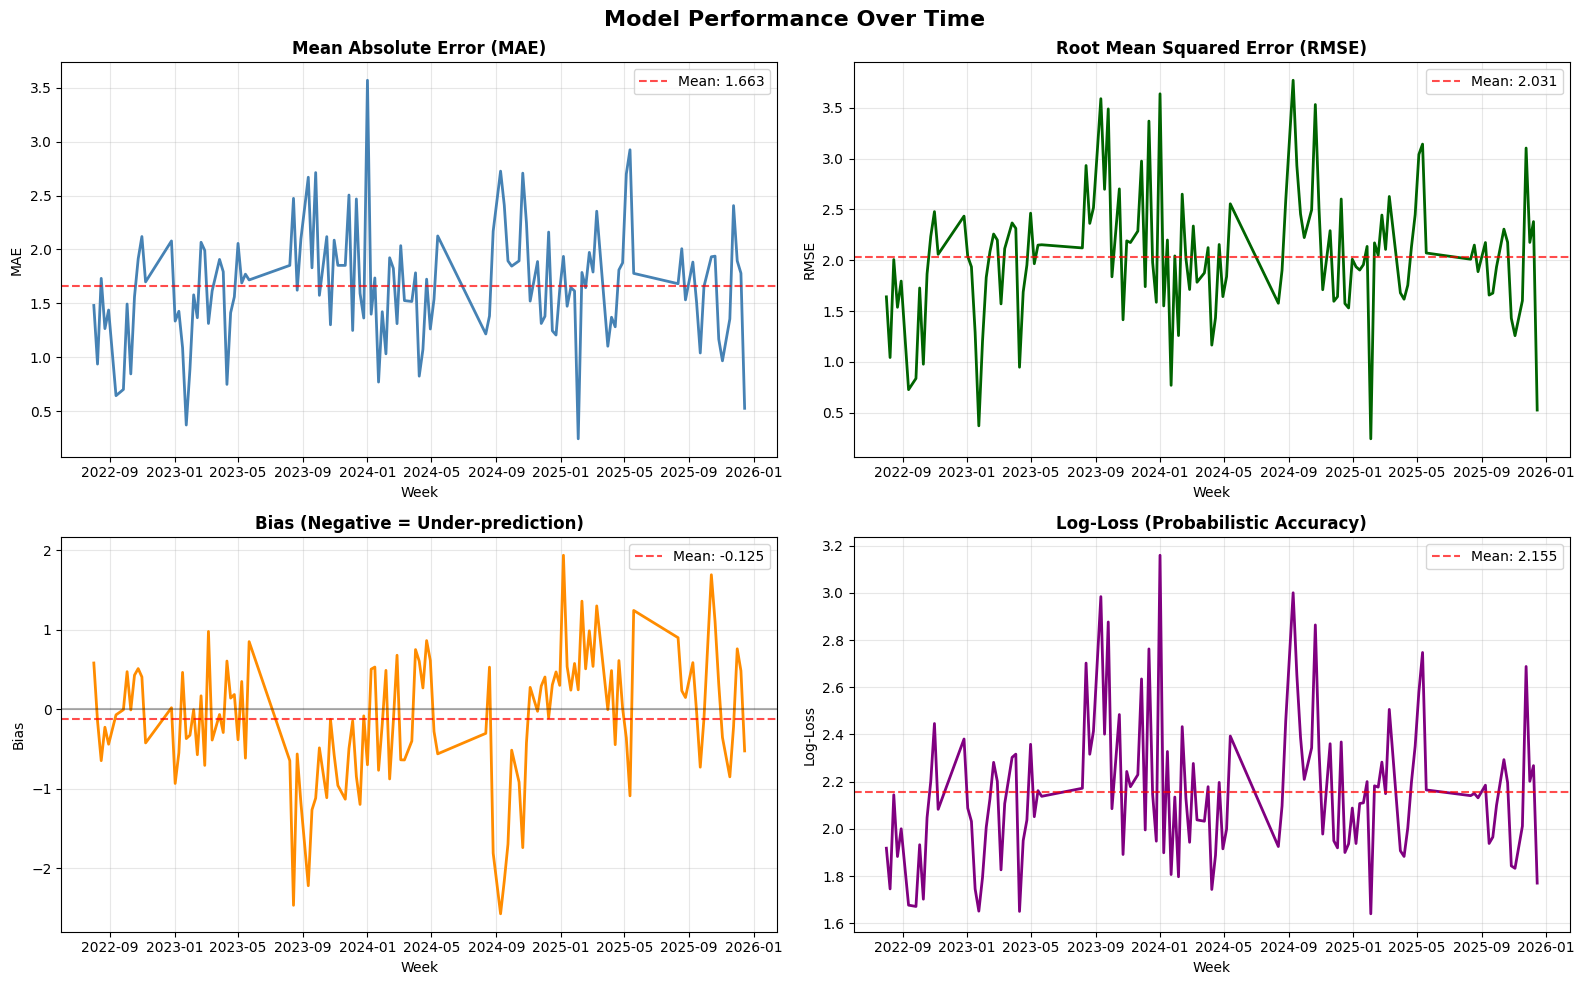

In [27]:
def plot_performance_over_time(weekly_scores):
    """
    Create comprehensive performance plots.
    2x2 grid
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Model Performance Over Time', fontsize=16, fontweight='bold')
    
    # MAE plot
    axes[0, 0].plot(weekly_scores['week_ts'], weekly_scores['mae'], # plot these cols on the top left subplot
                    linewidth=2, color='steelblue')
    
    axes[0, 0].axhline(weekly_scores['mae'].mean(), # add horizontal ref line
                       color='red', linestyle='--', alpha=0.7, 
                       label=f"Mean: {weekly_scores['mae'].mean():.3f}")
    
    
    axes[0, 0].set_title('Mean Absolute Error (MAE)', fontweight='bold')
    axes[0, 0].set_xlabel('Week')
    axes[0, 0].set_ylabel('MAE')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    
    
    # RMSE plot
    axes[0, 1].plot(weekly_scores['week_ts'], weekly_scores['rmse'], 
                    linewidth=2, color='darkgreen')
    axes[0, 1].axhline(weekly_scores['rmse'].mean(), 
                       color='red', linestyle='--', alpha=0.7,
                       label=f"Mean: {weekly_scores['rmse'].mean():.3f}")
    axes[0, 1].set_title('Root Mean Squared Error (RMSE)', fontweight='bold')
    axes[0, 1].set_xlabel('Week')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    
    
    # Bias plot
    axes[1, 0].plot(weekly_scores['week_ts'], weekly_scores['bias'], 
                    linewidth=2, color='darkorange')
    axes[1, 0].axhline(0, color='black', linestyle='-', alpha=0.3)
    axes[1, 0].axhline(weekly_scores['bias'].mean(), 
                       color='red', linestyle='--', alpha=0.7,
                       label=f"Mean: {weekly_scores['bias'].mean():.3f}")
    axes[1, 0].set_title('Bias (Negative = Under-prediction)', fontweight='bold')
    axes[1, 0].set_xlabel('Week')
    axes[1, 0].set_ylabel('Bias')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    
    
    # Log-Loss plot
    axes[1, 1].plot(weekly_scores['week_ts'], weekly_scores['log_loss'], 
                    linewidth=2, color='purple')
    axes[1, 1].axhline(weekly_scores['log_loss'].mean(), 
                       color='red', linestyle='--', alpha=0.7,
                       label=f"Mean: {weekly_scores['log_loss'].mean():.3f}")
    axes[1, 1].set_title('Log-Loss (Probabilistic Accuracy)', fontweight='bold')
    axes[1, 1].set_xlabel('Week')
    axes[1, 1].set_ylabel('Log-Loss')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# Create plots
plot_performance_over_time(weekly_scores)

## Summary statistics

In [28]:
def print_summary_statistics(results_df):
    """Print summary statistics about predictions."""
    
    print("\n" + "=" * 60)
    print("PREDICTION SUMMARY STATISTICS")
    print("=" * 60)
    
    print("\nActual Cards:")
    print(f"  Mean:   {results_df['actual_cards'].mean():.3f}")
    print(f"  Median: {results_df['actual_cards'].median():.3f}")
    print(f"  Std:    {results_df['actual_cards'].std():.3f}")
    print(f"  Min:    {results_df['actual_cards'].min():.0f}")
    print(f"  Max:    {results_df['actual_cards'].max():.0f}")
    
    print("\nPredicted Cards:")
    print(f"  Mean:   {results_df['predicted_cards'].mean():.3f}")
    print(f"  Median: {results_df['predicted_cards'].median():.3f}")
    print(f"  Std:    {results_df['predicted_cards'].std():.3f}")
    print(f"  Min:    {results_df['predicted_cards'].min():.3f}")
    print(f"  Max:    {results_df['predicted_cards'].max():.3f}")
    
    print("\nError Distribution:")
    print(f"  Mean Error:      {results_df['error'].mean():.3f}")
    print(f"  Mean Abs Error:  {results_df['abs_error'].mean():.3f}")
    print(f"  Std of Error:    {results_df['error'].std():.3f}")
    
    # Percentage of predictions within certain ranges
    within_1 = (results_df['abs_error'] <= 1).sum() / len(results_df) * 100
    within_2 = (results_df['abs_error'] <= 2).sum() / len(results_df) * 100
    within_3 = (results_df['abs_error'] <= 3).sum() / len(results_df) * 100
    
    print("\nPrediction Accuracy:")
    print(f"  Within 1 card:  {within_1:.1f}%")
    print(f"  Within 2 cards: {within_2:.1f}%")
    print(f"  Within 3 cards: {within_3:.1f}%")
    
    print("=" * 60 + "\n")


# Print summary
print_summary_statistics(results_df)


PREDICTION SUMMARY STATISTICS

Actual Cards:
  Mean:   4.015
  Median: 4.000
  Std:    2.144
  Min:    0
  Max:    14

Predicted Cards:
  Mean:   3.927
  Median: 3.948
  Std:    0.458
  Min:    2.478
  Max:    5.498

Error Distribution:
  Mean Error:      -0.088
  Mean Abs Error:  1.673
  Std of Error:    2.129

Prediction Accuracy:
  Within 1 card:  37.4%
  Within 2 cards: 66.5%
  Within 3 cards: 83.8%



## Save results

In [29]:
import os

# Create output directories if they don't exist
os.makedirs('outputs/results', exist_ok=True)
os.makedirs('outputs/models', exist_ok=True)
os.makedirs('outputs/plots', exist_ok=True)

# Save results
weekly_scores.to_csv('outputs/results/weekly_performance.csv', index=False)
print("✓ Weekly performance saved to 'outputs/results/weekly_performance.csv'")

results_df.to_csv('outputs/results/match_predictions.csv', index=False)
print("✓ Match predictions saved to 'outputs/results/match_predictions.csv'")

# Save model profiles (useful for analysis later)
teams_over_time.to_csv('outputs/models/teams_over_time.csv', index=False)
print("✓ Team profiles saved to 'outputs/models/teams_over_time.csv'")

refs_over_time.to_csv('outputs/models/refs_over_time.csv', index=False)
print("✓ Referee profiles saved to 'outputs/models/refs_over_time.csv'")

print("\n✓ All outputs saved successfully!")

print("\nAnalysis complete!")

✓ Weekly performance saved to 'outputs/results/weekly_performance.csv'
✓ Match predictions saved to 'outputs/results/match_predictions.csv'
✓ Team profiles saved to 'outputs/models/teams_over_time.csv'
✓ Referee profiles saved to 'outputs/models/refs_over_time.csv'

✓ All outputs saved successfully!

Analysis complete!


#### RESULTS WITH alpha_team=0.002, alpha_ref= 0.001 WITH REF SCALING

- 'matches': 1225,
-  'mae': np.float64(1.7264394643824863),
-  'rmse': np.float64(2.17841835675447),
-  'bias': np.float64(-0.09434781082315412)}

RESULTS WITH NEW FIT_TEAM_MIX_WEIGHTS FUNC  WITH alpha_team=0.002, alpha_ref= 0.001 WITH REF SCLAING
- 'matches': 1293,
 - 'mae': np.float64(1.7172550455362463),
 - 'rmse': np.float64(2.1766862938874487),
 -  'bias': np.float64(-0.11307660608135317)}

#### RESULTS WITH alpha_team=0.002, alpha_ref= 0.001 WITHOUT REF SCALING 
- {'matches': 1293,
-   'mae': np.float64(1.6726277986754923),
-   'rmse': np.float64(2.1301926333345236),
-   'bias': np.float64(-0.08824219246407143)}

results 

alpha_team=0.002, alpha_ref= 0.001 

WITH REF SCLAING

np.float64(2.1819974334140366) log loss

results 

alpha_team=0.002, alpha_ref= 0.001 

WITHOUT REF SCLAING

np.float64(2.155681131731846) log loss